In [152]:
from scipy import signal
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

In [153]:
def nth_coefficient(y, x, lower, upper, n):
    T = upper - lower
    mask = (x <= upper) & (x >= lower)
    x_integrate = x[mask]
    y_filter = y[:np.size(x_integrate)]
    cos_integrate = y_filter * np.cos(2 * np.pi * (1.0 / T) * x_integrate * n)
    sin_integrate = y_filter * np.sin(2 * np.pi * (1.0 / T) * x_integrate * n)
    coeff_cos = (2.0 / T) * integrate.cumtrapz(cos_integrate, x_integrate, initial=0)[-1]
    coeff_sin = (2.0 / T) * integrate.cumtrapz(sin_integrate, x_integrate, initial=0)[-1]
    return np.hypot(coeff_cos, coeff_sin)

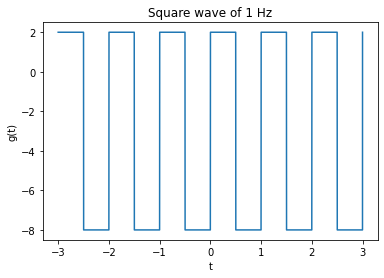

In [154]:
# Plotting
t = np.linspace(-3, 3, 10000, endpoint=True)
frequency = 1
sqr = 5 * signal.square(2 * np.pi * frequency * t) - 3
plt.plot(t, sqr)
plt.title("Square wave of 1 Hz")
plt.xlabel("t")
plt.ylabel("g(t)")
plt.show()

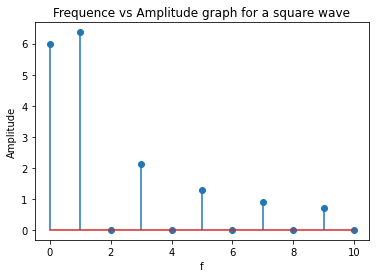

In [155]:
n = np.arange(0.0, 11.0, 1)
amps = []
for j in n:
    amps = np.concatenate([amps, [nth_coefficient(sqr, t, 0, 1, j)]])
    
plt.stem(n, amps)
plt.xlabel("f")
plt.ylabel("Amplitude")
plt.title("Frequence vs Amplitude graph for a square wave")
plt.show()

11


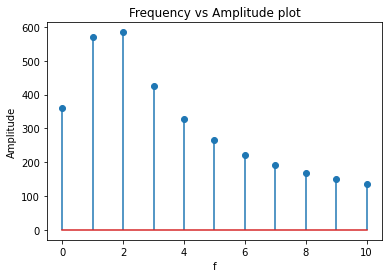

In [156]:
# For a polynomial
t = np.linspace(-5, 5, 10000, endpoint=True)
gt = 17 * np.power(t, 3) - np.power(t, 4) - np.power(t, 2) - 47
n = np.arange(0, 11, 1)
print(np.size(n))
amps2 = []
for j in n:
    amps2 = np.concatenate([amps2, [nth_coefficient(gt, t, -5, 5, j)]])


plt.stem(n, amps2)
plt.xlabel("f")
plt.ylabel("Amplitude")
plt.title("Frequency vs Amplitude plot")
plt.show()